**Nama: M Mirza Rizkiawan**

**NIM : 1301194330**

**Kelas : IF4307**

#Formulasi Masalah

Berdasarkan deskripsi pada soal, permasalahan yang coba diselesaikan pada tugas ini adalah melakukan pengelompokkan (clustering) pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak.

#Eksplorasi dan Persiapan Data

##Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Download data

In [ ]:
#Download data kendaraan_test kemudian tampilkan data tersebut
train_data = !gdown --id 1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
train_data = pd.read_csv('kendaraan_train.csv')
train_data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#Download data kendaraan_train kemudian tampilkan data tersebut
test_data = !gdown --id 1qKwfBtdGcpflaaS9DFf5p3VHFXGRSIVw
test_data = pd.read_csv('kendaraan_test.csv')
test_data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


##Eksplorasi Data

In [ ]:
#informasi jumlah baris dan kolom pada train_data
print('jumlah baris,kolom pada train_data',train_data.shape)

jumlah baris,kolom pada train_data (285831, 12)


In [ ]:
#informasi jumlah baris dan kolom pada test_data (baris,kolom)
print('jumlah baris,kolom pada test_data',test_data.shape)

jumlah baris,kolom pada test_data (47639, 11)


In [ ]:
#informasi setiap kolom pada train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#informasi setiap kolom pada test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
#informasi statistik dari train_data
train_data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##Transform Data

In [ ]:
# fungsi transform untuk mengubah kolom yang memiliki tipe object menjadi tipe float64
# kolom dengan tipe object : (Jenis_Kelamin, Umur_Kendaraan, Kendaraan_Rusak) 
def Transform_Jenis_Kelamin(x):
  if x == "Pria":
    return 1
  elif x == "Wanita":
    return 0
  else:
    return None

def Transform_Umur_Kendaraan(x):
  if x == "< 1 Tahun":
    return 0
  elif x =="1-2 Tahun":
    return 1
  elif x =="> 2 Tahun":
    return 2
  else:
    return None

def Transform_Kendaraann_Rusak(x):
  if x == "Pernah":
    return 0
  elif x =="Tidak":
    return 1
  else:
    return None

train_data['Jenis_Kelamin'] = train_data['Jenis_Kelamin'].apply(Transform_Jenis_Kelamin)
train_data['Umur_Kendaraan'] = train_data['Umur_Kendaraan'].apply(Transform_Umur_Kendaraan)
train_data['Kendaraan_Rusak'] = train_data['Kendaraan_Rusak'].apply(Transform_Kendaraann_Rusak)

train_data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,1.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,1.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,1.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4.0,1.0,0.0,1.0,25988.0,152.0,217.0,0
285827,285828,0.0,21.0,1.0,46.0,1.0,0.0,1.0,44686.0,152.0,50.0,0
285828,285829,0.0,23.0,1.0,50.0,1.0,0.0,1.0,49751.0,152.0,226.0,0
285829,285830,1.0,68.0,1.0,7.0,1.0,1.0,1.0,30503.0,124.0,270.0,0


##Data Cleaning

In [ ]:
#cek nilai null pada train_data
print(train_data.isna().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


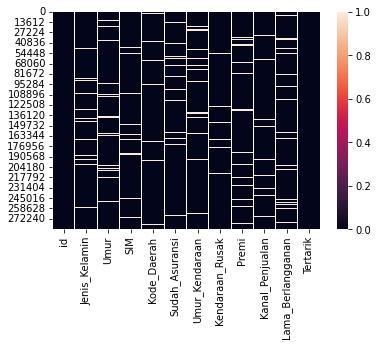

In [ ]:
#visualisasi nilai null pada setiap kolom
checknull_heatmap = sns.heatmap(train_data.isna())

In [ ]:
#drop baris yang memiliki nilai null
train_data_df = train_data.dropna()
print(train_data_df.isna().sum())

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [ ]:
#cek duplicate data
#Karena tidak ada duplicate data maka tidak perlu melakukan drop untuk duplicate data
train_data_df.duplicated().sum()

0

In [ ]:
#Drop kolom yang tidak dibutuhkan
train_data_df = train_data_df.drop(columns=['id','Tertarik'])
train_data_df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,1.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0
3,0.0,58.0,1.0,48.0,0.0,1.0,1.0,2630.0,124.0,63.0
5,1.0,21.0,1.0,35.0,1.0,0.0,1.0,22735.0,152.0,171.0
8,0.0,20.0,1.0,8.0,1.0,0.0,1.0,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,1.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,1.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,1.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,1.0,30503.0,124.0,270.0


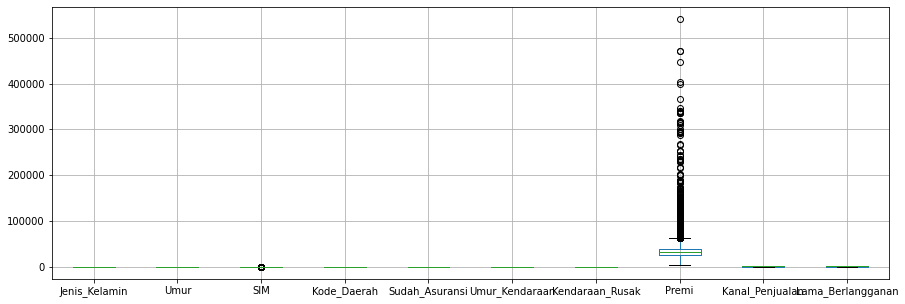

In [ ]:
#cek outlier
train_data_df.boxplot(figsize=[15,5])

In [ ]:
#outlier handling
Q1 = train_data_df['Premi'].quantile(0.25)
Q3 = train_data_df['Premi'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("lower bound: ",lower_bound,"\nupper bound: ",upper_bound)

for i in range(len(train_data_df)):
  if train_data_df['Premi'].iloc[i] > upper_bound:
    train_data_df['Premi'].iloc[i] = upper_bound

lower bound:  1939.5 
upper bound:  61753.5


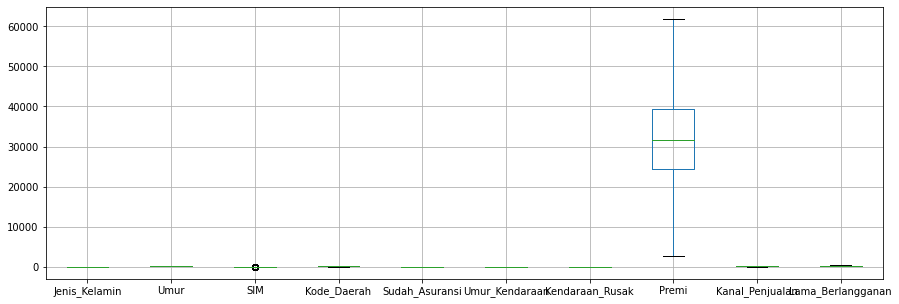

In [ ]:
#boxplot setelah outlier handling pada kolom premi
train_data_df.boxplot(figsize=[15,5])

##Korelasi data

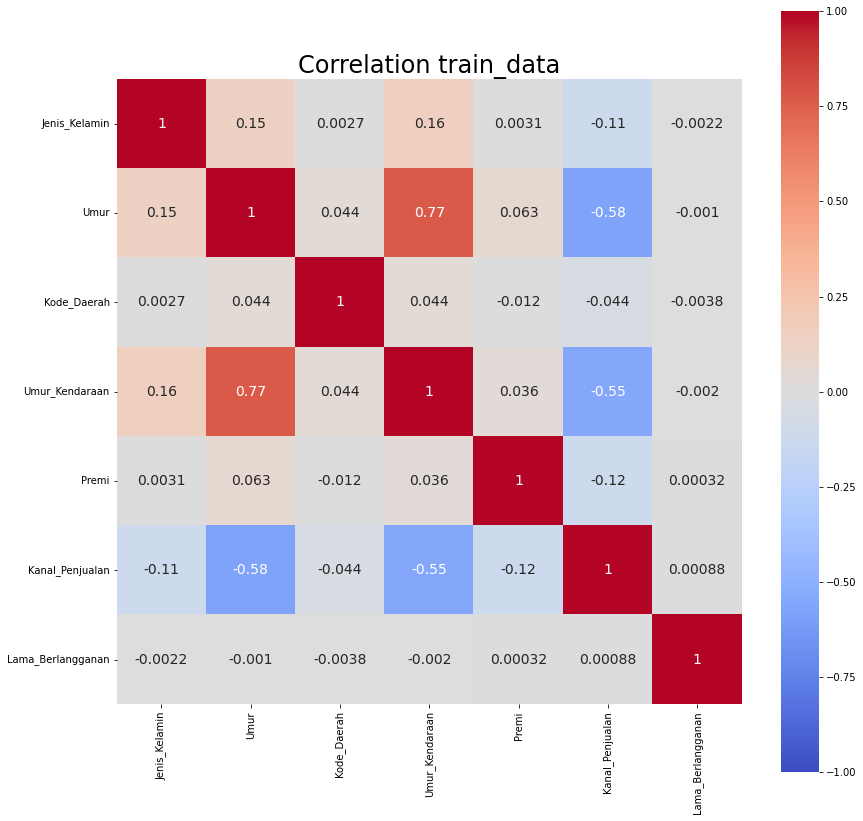

In [ ]:
# Visualisasi korelasi data menggunakan heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(train_data_df[['Jenis_Kelamin','Umur','Kode_Daerah','Umur_Kendaraan','Premi','Kanal_Penjualan','Lama_Berlangganan']].corr(),
            annot=True, ax=ax, square=True, cmap="coolwarm", vmin=-1, vmax=1, annot_kws={'size':14})
plt.title('Correlation train_data',size=24)
plt.show()

##Data Splitting

In [ ]:
df = train_data_df.iloc[:,[1,7]].values
df

array([[3.0000e+01, 2.8029e+04],
       [4.8000e+01, 2.5800e+04],
       [5.8000e+01, 2.6300e+03],
       ...,
       [2.3000e+01, 4.9751e+04],
       [6.8000e+01, 3.0503e+04],
       [4.5000e+01, 3.6480e+04]])

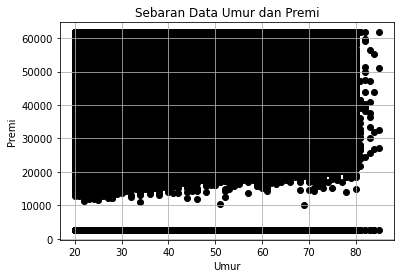

In [ ]:
plt.scatter(df[:,0],df[:,1], color='black')
plt.title("Sebaran Data Umur dan Premi")
plt.xlabel("Umur")
plt.ylabel("Premi")
plt.grid(True)

#CLUSTERING DENGAN K-MEANS

In [ ]:
def Euclidean_Distance(x1,x2):
  return np.square(sum((x1-x2)**2))

In [ ]:
#Fungsi untuk menentukan cluster pada setiap data
def clustering(centroids, cluster_arr):
  clusters = []
  for i in range(len(cluster_arr)):#Looping sebanyak jumlah baris
    Distance = []
    for centroid in centroids:#Looping sebanyak jumlah centroid sesuai dengan nilai K
      Distance.append(Euclidean_Distance(centroid, cluster_arr[i]))#Menghitung Jarak dari setiap data dengan seluruh Centroid
    jarak_min = [x for x, val in enumerate(Distance) if val == min(Distance)]#Mencari centroid terdekat
    clusters.append(jarak_min[0])#Menentukan cluster
  return np.array(clusters)

In [ ]:
#Fungsi untuk menentukan centroid baru untuk setiap cluster
def new_cent(clusters, cluster_arr):
  new_centroids = []
  df_cluster = pd.concat([pd.DataFrame(cluster_arr), pd.DataFrame(clusters, columns=['cluster'])], axis=1)#Menggabungkan DataFrame
  for c in set(df_cluster['cluster']):#Looping sebanyak jumlah cluster pada kolom cluster dataframe.
    curr_cluster = df_cluster[df_cluster['cluster']==c][df_cluster.columns[:-1]]
    mean_cluster = curr_cluster.mean(axis=0)#Mencari Mean dari Cluster
    new_centroids.append(mean_cluster)#Mean menjadi centroid baru dalam Cluster
  return np.array(new_centroids)

In [ ]:
K = 3 #Menentukan Nilai K (Jumlah Cluster)
first_centroid = np.random.choice(len(df), K, replace=True)
centroids = df[first_centroid, :] #Menentukan posisi centroid awal secara acak
clusters = clustering(centroids, df) #Menentukan Cluster berdasarkan centroid awal
for i in range(20): #Loop untuk mengulangi penentuan centroid dan cluster
  centroids = new_cent(clusters, df)
  clusters = clustering(centroids, df) 

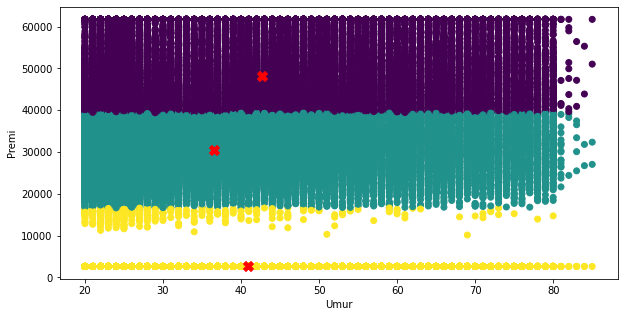

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df[:,0],y=df[:,1], 
              c=clusters, cmap='viridis');
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='red', marker='X', s=100);
plt.xlabel('Umur')
plt.ylabel('Premi');

##Evaluasi menggunakan elbow method

<function matplotlib.pyplot.show>

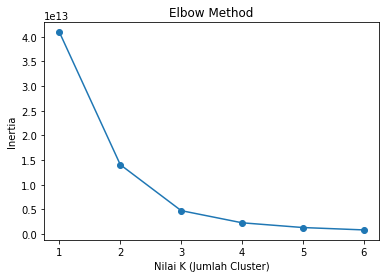

In [ ]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1,7):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df)
    SSE.append(k_means.inertia_)
plt.title('Elbow Method')
plt.xlabel('Nilai K (Jumlah Cluster)')
plt.ylabel('Inertia')
plt.plot(range(1,7),SSE,marker='o')
plt.show

#Eksperimen

In [ ]:
# Eksperimen dengan nilai K = 2
K = 2 
first_centroid = np.random.choice(len(df), K, replace=True)
centroids = df[first_centroid, :] 
clusters = clustering(centroids, df) 
for i in range(20): 
  centroids = new_cent(clusters, df)
  clusters = clustering(centroids, df) 

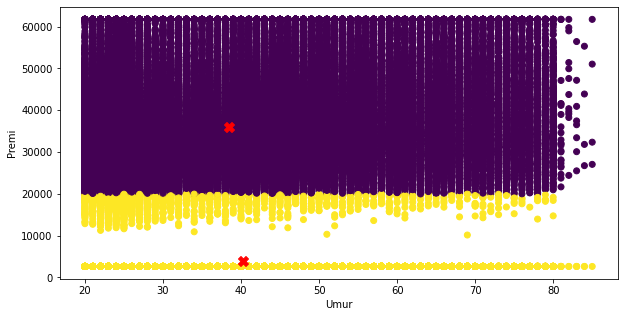

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df[:,0],y=df[:,1], 
              c=clusters, cmap='viridis');
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='red', marker='X', s=100);
plt.xlabel('Umur')
plt.ylabel('Premi');

In [ ]:
# Eksperimen dengan nilai K = 4
K = 4
first_centroid = np.random.choice(len(df), K, replace=True)
centroids = df[first_centroid, :] 
clusters = clustering(centroids, df) 
for i in range(20): 
  centroids = new_cent(clusters, df)
  clusters = clustering(centroids, df) 

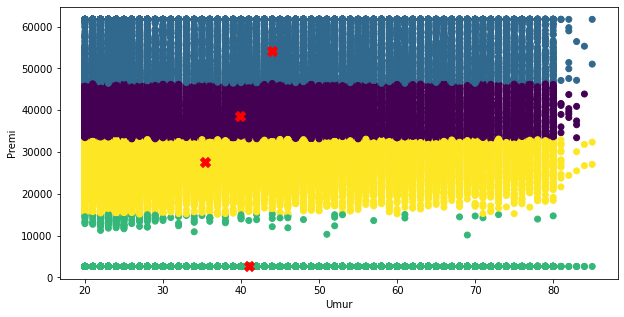

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df[:,0],y=df[:,1], 
              c=clusters, cmap='viridis');
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='red', marker='X', s=100);
plt.xlabel('Umur')
plt.ylabel('Premi');

#Kesimpulan

Kesimpulan yang di dapatkan adalah sebelum melakukan clustering diperlukan beberapa tahapan termasuk eksplorasi dan data cleaning (menghilangkan nilai null dan duplicate pada data) setelah itu kita dapat mencari pencilan / outlier pada data kemudian mencari nilai korelasi dari setiap kolom sehingga di dapatkan kolom yang akan dijadikan fitur untuk clustering (pada tugas ini kolom yang dipilih kolom umur dan premi). Kemudian kita dapat melakukan clustering dengan metode K-Means lalu melakukan evaluasi menggunakan elbow method agar mendapatkan nilai K yang sesuai, nilai yang didapatkan dari elbow method akan digunakan untuk memperbaiki jumlah cluster pada proses clustering sehingga didapatkan hasil clustering yang lebih baik.